# 라이브러리 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# 모델 생성
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
def churn_prediction(df, test_df):
    # 범주형 컬럼 One-Hot Encoding
    encoding_df = pd.get_dummies(df, columns=['Membership', 'Contract'])

    # 학습/테스트셋 분리
    y_target = encoding_df['Churn Value']
    X_data = encoding_df.drop(['Churn Value'], axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=156)

    # 학습 데이터셋(수치형 컬럼) 정규화
    ## Initialize variable
    X_train_origin, X_test_origin, y_train_origin, y_test_origin = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

    ## Numeric Only
    Numeric_column_list = []
    for i in range(len(X_data.columns)):
        if X_data[X_data.columns[i]].dtype == 'float64' or X_data[X_data.columns[i]].dtype == 'int64':
            Numeric_column_list.append(X_data.columns[i])

    numeric_train_data, numeric_test_data = X_train[Numeric_column_list], X_test[Numeric_column_list]

    scaler = MinMaxScaler()

    X_train[Numeric_column_list] = scaler.fit_transform(numeric_train_data)
    X_test[Numeric_column_list] = scaler.transform(numeric_test_data)

    # 선정한 모델로 학습
    best_model = SGDClassifier(random_state=42, alpha=0.001, loss='modified_huber',
                               max_iter=100, penalty='l1', tol=1e-05)

    best_model.fit(X_train, y_train)


    # 예측 결과 저장
    
    result_df = test_df.copy()
    
    ## 범주형 컬럼 One-Hot Encoding
    encoding_test_data = pd.get_dummies(result_df, columns=['Membership', 'Contract'])
    
    ## 정규화 (Numeric Only)
    test_Numeric_column_list = []
    for i in range(len(encoding_test_data.columns)):
        if encoding_test_data[encoding_test_data.columns[i]].dtype == 'int32':
            test_Numeric_column_list.append(encoding_test_data.columns[i])
            
    test_numeric_data = encoding_test_data[test_Numeric_column_list]

    scaler = MinMaxScaler()

    encoding_test_data[test_Numeric_column_list] = scaler.fit_transform(test_numeric_data)
    final_test_data = encoding_test_data
            
    
    # 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
    predicted_probabilities = best_model.predict_proba(final_test_data)

    # 결과를 데이터프레임에 추가
    test_df['이탈확률'] = predicted_probabilities[:, 1]*100  # 클래스 1의 확률을 선택


    
    return test_df

# 학습에 이용할 데이터 로드

In [3]:
df = pd.read_excel("Churn.xlsx")
df

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,1,Offer E,3,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,71,3,Offer D,2,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,78,1,Offer C,2,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,80,1,Offer C,2,0,0,1,Month-to-Month,37,76.50,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,None,5,0,0,4,Two Year,72,21.15,3039.53,0
7039,38,2,Offer C,3,3,2,2,One Year,24,84.80,2807.47,0
7040,30,2,None,4,2,2,1,One Year,72,103.20,9453.04,0
7041,32,2,None,4,1,0,2,Month-to-Month,11,29.60,319.21,0


# 결과 저장할 데이터 로드

In [4]:
## 가상고객 데이터프레임 만들기

import pandas as pd

# 빈 데이터프레임 생성
test_df = pd.DataFrame()

test_df['Age'] = np.random.randint(19, 81, 100)
test_df['Number of Dependents'] = np.random.randint(0, 6, 100)

# Membership 옵션 리스트를 정의
membership_options = ["Offer A", "Offer B", "Offer C", "Offer D", "Offer E", "None"]
# test_df의 행 수만큼 랜덤으로 Membership 값을 선택하여 저장
test_df['Membership'] = [random.choice(membership_options) for _ in range(len(test_df))]

test_df['Satisfaction Score'] = np.random.randint(1, 6, 100)
test_df['Tech services'] = np.random.randint(0, 5, 100)
test_df['Streaming services'] = np.random.randint(0, 3, 100)
test_df['Combined Product'] = np.random.randint(1, 5, 100)

# Contract 옵션 리스트를 정의
contract_options = ["Month-to-Month", "One Year", "Two Year"]
# test_df의 행 수만큼 랜덤으로 Contract 값을 선택하여 저장
test_df['Contract'] = [random.choice(contract_options) for _ in range(len(test_df))]

test_df['Tenure in Months'] = np.random.randint(1, 73, 100)
test_df['Monthly Charge'] = np.random.randint(18, 119, 100)

# 'Total Revenue' 컬럼 생성
random_values = np.random.randint(-50, 151, size=100)
revenues = (test_df['Tenure in Months'] * test_df['Monthly Charge']) - random_values
test_df['Total Revenue'] = np.maximum(revenues, 0)

test_df

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue
0,21,0,Offer B,1,0,2,2,One Year,10,45,392
1,74,5,Offer E,2,4,0,1,Month-to-Month,63,43,2716
2,75,3,Offer B,5,3,1,4,One Year,13,59,795
3,56,4,Offer E,2,0,0,4,Month-to-Month,51,110,5580
4,67,2,Offer D,5,2,1,3,Month-to-Month,37,61,2124
...,...,...,...,...,...,...,...,...,...,...,...
95,31,4,None,1,3,1,1,Month-to-Month,18,27,504
96,44,2,Offer D,3,4,0,1,One Year,41,104,4245
97,31,2,Offer C,1,2,2,1,Two Year,36,47,1720
98,43,0,Offer A,1,2,1,2,One Year,2,101,224


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   100 non-null    int32 
 1   Number of Dependents  100 non-null    int32 
 2   Membership            100 non-null    object
 3   Satisfaction Score    100 non-null    int32 
 4   Tech services         100 non-null    int32 
 5   Streaming services    100 non-null    int32 
 6   Combined Product      100 non-null    int32 
 7   Contract              100 non-null    object
 8   Tenure in Months      100 non-null    int32 
 9   Monthly Charge        100 non-null    int32 
 10  Total Revenue         100 non-null    int32 
dtypes: int32(9), object(2)
memory usage: 5.2+ KB


# 함수 호출

In [6]:
result = churn_prediction(df, test_df)
result

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,이탈확률
0,21,0,Offer B,1,0,2,2,One Year,10,45,392,100.0
1,74,5,Offer E,2,4,0,1,Month-to-Month,63,43,2716,100.0
2,75,3,Offer B,5,3,1,4,One Year,13,59,795,0.0
3,56,4,Offer E,2,0,0,4,Month-to-Month,51,110,5580,100.0
4,67,2,Offer D,5,2,1,3,Month-to-Month,37,61,2124,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,4,None,1,3,1,1,Month-to-Month,18,27,504,100.0
96,44,2,Offer D,3,4,0,1,One Year,41,104,4245,0.0
97,31,2,Offer C,1,2,2,1,Two Year,36,47,1720,100.0
98,43,0,Offer A,1,2,1,2,One Year,2,101,224,100.0


* 이탈확률 분포 확인

<AxesSubplot:xlabel='이탈확률', ylabel='Density'>

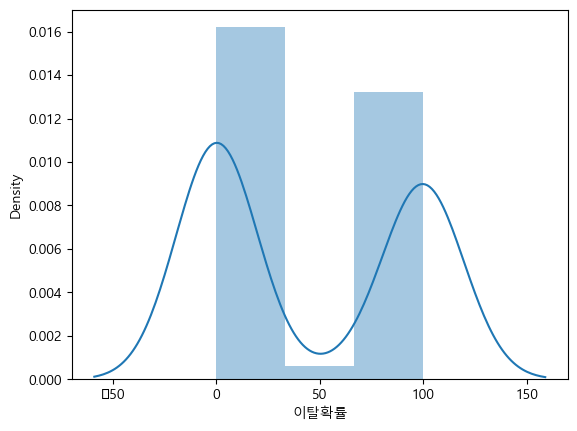

In [7]:
sns.distplot(result["이탈확률"])

<AxesSubplot:xlabel='Satisfaction Score', ylabel='이탈확률'>

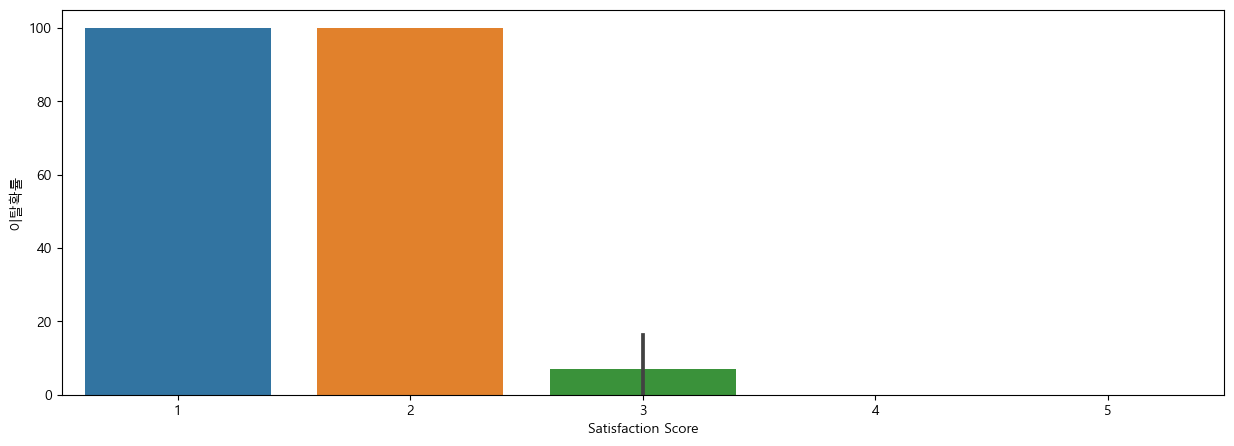

In [8]:
# Satisfaction Score
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=result, x="Satisfaction Score", y="이탈확률", ax=ax1)

<AxesSubplot:xlabel='Contract', ylabel='이탈확률'>

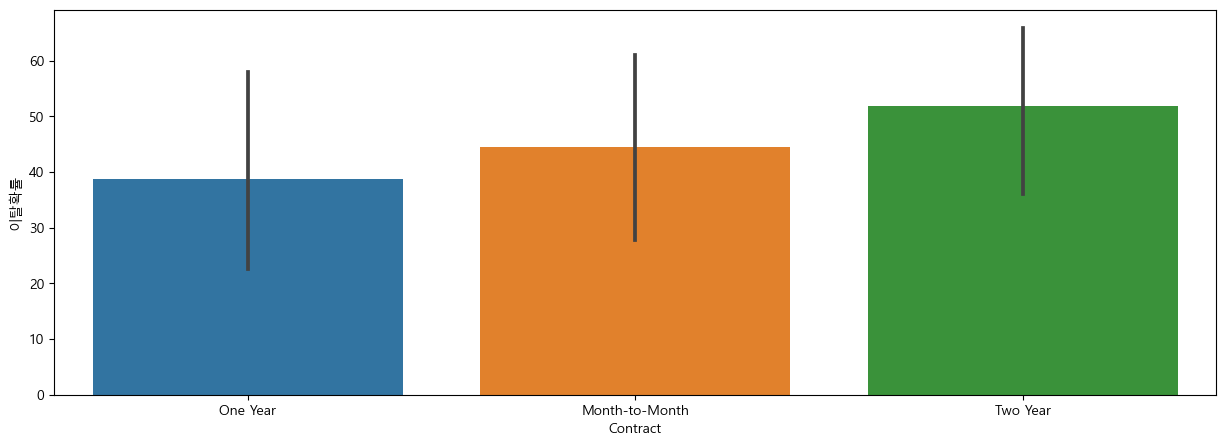

In [9]:
# Contract
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
sns.barplot(data=result, x="Contract", y="이탈확률", ax=ax1)